# ASSIGNMENT 2

### RAMINI VARUN BABU.


### TITANIC SHIP CASE STUDY


1. Download the dataset.


Downloaded the dataset titanic using the given link

2. Load the dataset


In [1]:
import numpy as np
import pandas as pd

In [3]:
data=pd.read_csv("C:/btech/applied datascience intern/titanic.csv")
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Handling the missing values

In [4]:
data.isnull().any()

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

In [7]:
#the outcome true indicates the presence of the missing values in that attribute 
data.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
# Here we have total of 891 records and 15 attributes. out of 15 there are 3 attributes which contain null values.
#deck have 688 missing values. so it is  better to remove the attribute than replacing the values since there are large number
#of missing values.

data = data.drop(columns=['deck'])
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [10]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [11]:
#fiiling the null values with its mean.
data['age'].fillna(np.ceil(data['age'].mean()),inplace=True)

In [12]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [15]:
#replacing null values with its mode
data['embarked'].fillna(data['embarked'].mode()[0],inplace=True)
data.isna().any()

survived       False
pclass         False
sex            False
age            False
sibsp          False
parch          False
fare           False
embarked       False
class          False
who            False
adult_male     False
embark_town     True
alive          False
alone          False
dtype: bool

In [16]:
data['embark_town'].fillna(data['embark_town'].mode()[0],inplace=True)
data.isna().any()

survived       False
pclass         False
sex            False
age            False
sibsp          False
parch          False
fare           False
embarked       False
class          False
who            False
adult_male     False
embark_town    False
alive          False
alone          False
dtype: bool

3 a. Univariate Analysis.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Ramini Varun Babu\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Fare Distribution plot')

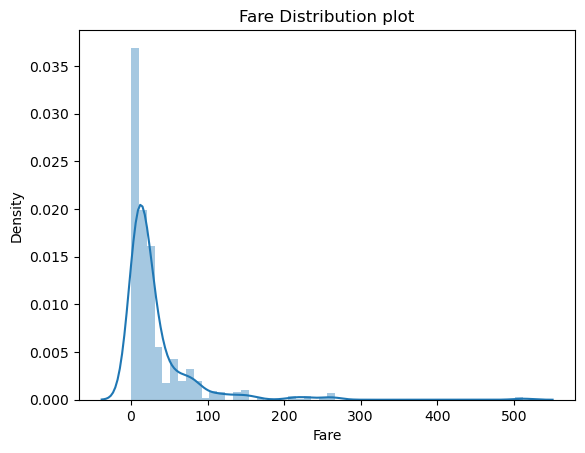

In [18]:
sns.distplot(data['fare'])
plt.xlabel("Fare")
plt.title("Fare Distribution plot")

([<matplotlib.patches.Wedge at 0x1204d0fa0a0>,
 [Text(-0.3925749350994583, 1.0275626113924428, 'Not Survived'),
  Text(0.3925750313068116, -1.0275625746369201, 'Survived')],
 [Text(-0.21413178278152267, 0.5604886971231505, '61.62%'),
  Text(0.21413183525826085, -0.5604886770746836, '38.38%')])

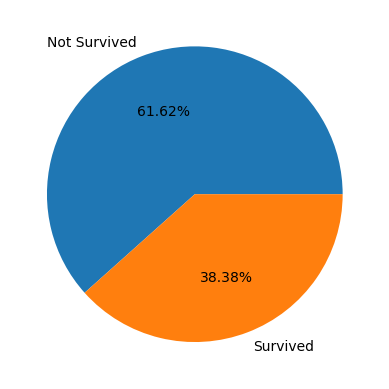

In [19]:
plt.pie(data['survived'].value_counts(),labels=['Not Survived','Survived'],autopct="%.2f%%")

4. Bivarient Analysis

<AxesSubplot:xlabel='class', ylabel='survived'>

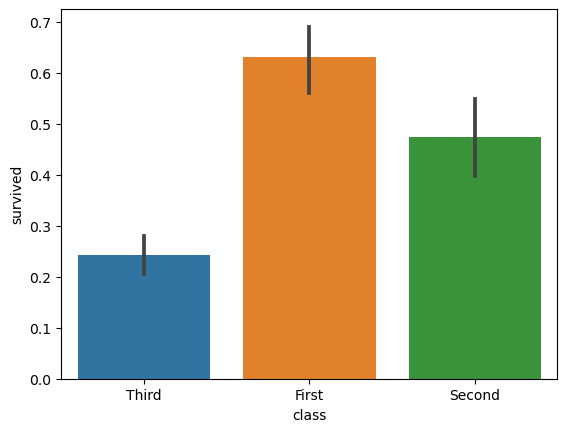

In [20]:
sns.barplot(data=data,x='class',y='survived')

<AxesSubplot:xlabel='age', ylabel='fare'>

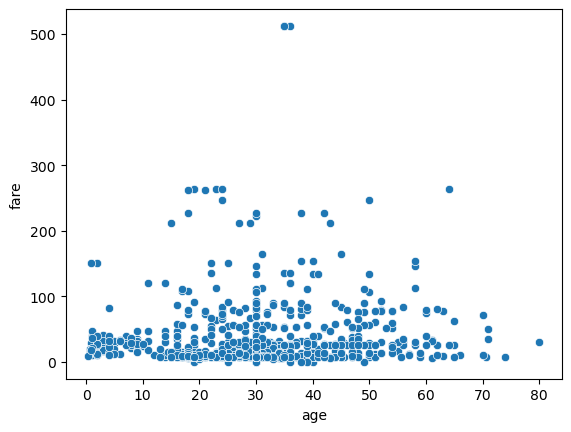

In [21]:
sns.scatterplot(data=data, x='age', y='fare')

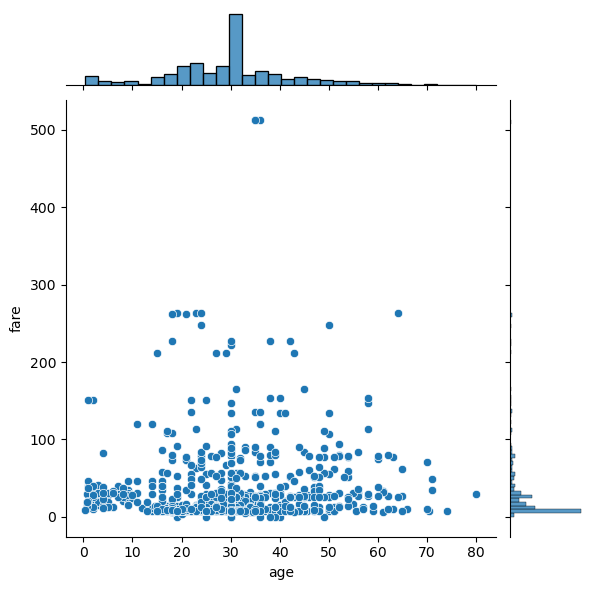

In [22]:
sns.jointplot(data=data,x='age',y='fare')

6. Multivarient Analysis

<AxesSubplot:>

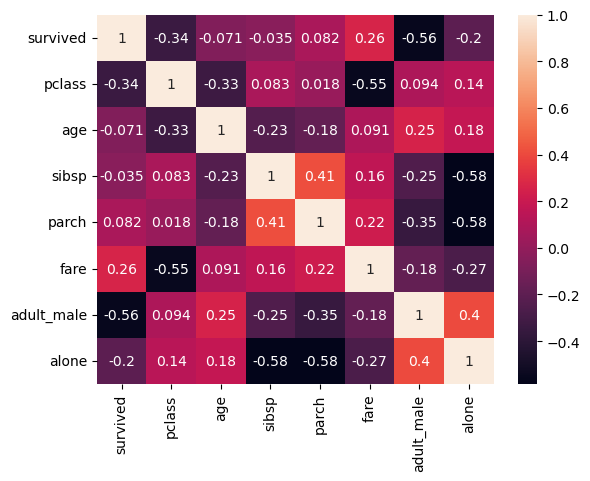

In [24]:
sns.heatmap(data.corr(),annot=True)

7. Descriptive statistics

Here we need only the attributes which are numeric. So we will create a new dataframe with only the numeric attributes

In [26]:
data1 = data.drop(columns=['sex','class','embarked','embark_town','who','adult_male','alive','alone'])
data1

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,30.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [27]:
data1.mean()

survived     0.383838
pclass       2.308642
age         29.758889
sibsp        0.523008
parch        0.381594
fare        32.204208
dtype: float64

In [28]:
data1.median()

survived     0.0000
pclass       3.0000
age         30.0000
sibsp        0.0000
parch        0.0000
fare        14.4542
dtype: float64

In [29]:
data1.mode()

,survived,pclass,age,sibsp,parch,fare
0,0,3,30.0,0,0,8.05


In [30]:
data.mode()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,30.0,0,0,8.05,S,Third,man,True,Southampton,no,True


In [31]:
data.max()

survived                 1
pclass                   3
sex                   male
age                   80.0
sibsp                    8
parch                    6
fare              512.3292
embarked                 S
class                Third
who                  woman
adult_male            True
embark_town    Southampton
alive                  yes
alone                 True
dtype: object

In [32]:
data.min()

survived               0
pclass                 1
sex               female
age                 0.42
sibsp                  0
parch                  0
fare                 0.0
embarked               C
class              First
who                child
adult_male         False
embark_town    Cherbourg
alive                 no
alone              False
dtype: object

In [33]:
data.var()

C:\Users\Ramini Varun Babu\AppData\Local\Temp\ipykernel_6928\445316826.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.var()


survived         0.236772
pclass           0.699015
age            169.066828
sibsp            1.216043
parch            0.649728
fare          2469.436846
adult_male       0.239723
alone            0.239723
dtype: float64

In [34]:
data.std()

C:\Users\Ramini Varun Babu\AppData\Local\Temp\ipykernel_6928\2723740006.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.std()


survived       0.486592
pclass         0.836071
age           13.002570
sibsp          1.102743
parch          0.806057
fare          49.693429
adult_male     0.489615
alone          0.489615
dtype: float64

In [35]:
quantile = data1.quantile(q=[0.25,0.75])
quantile

,survived,pclass,age,sibsp,parch,fare
0.25,0.0,2.0,22.0,0.0,0.0,7.9104
0.75,1.0,3.0,35.0,1.0,0.0,31.0000


In [36]:
IQR = quantile.iloc[1]-quantile.iloc[0]

In [37]:
upper_extreme = quantile.iloc[1]+(1.5*IQR)
upper_extreme

survived     2.5000
pclass       4.5000
age         54.5000
sibsp        2.5000
parch        0.0000
fare        65.6344
dtype: float64

In [38]:
lower_extreme = quantile.iloc[0]-(1.5*IQR)
lower_extreme

survived    -1.500
pclass       0.500
age          2.500
sibsp       -1.500
parch        0.000
fare       -26.724
dtype: float64

In [39]:
data.skew()

C:\Users\Ramini Varun Babu\AppData\Local\Temp\ipykernel_6928\1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


survived      0.478523
pclass       -0.630548
age           0.420613
sibsp         3.695352
parch         2.749117
fare          4.787317
adult_male   -0.420431
alone        -0.420431
dtype: float64

In [40]:
data.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.070657,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.329727,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.070657,-0.329727,1.000000,-0.232440,-0.180330,0.090632,0.254145,0.181165
sibsp,-0.035322,0.083081,-0.232440,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.180330,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.090632,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.254145,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.181165,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [41]:
data.kurt()

C:\Users\Ramini Varun Babu\AppData\Local\Temp\ipykernel_6928\2907027414.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.kurt()


survived      -1.775005
pclass        -1.280015
age            0.957704
sibsp         17.880420
parch          9.778125
fare          33.398141
adult_male    -1.827345
alone         -1.827345
dtype: float64

In [42]:
data['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [43]:
data['alive'].value_counts()

no     549
yes    342
Name: alive, dtype: int64

Handling the Outliers

C:\Users\Ramini Varun Babu\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare'>

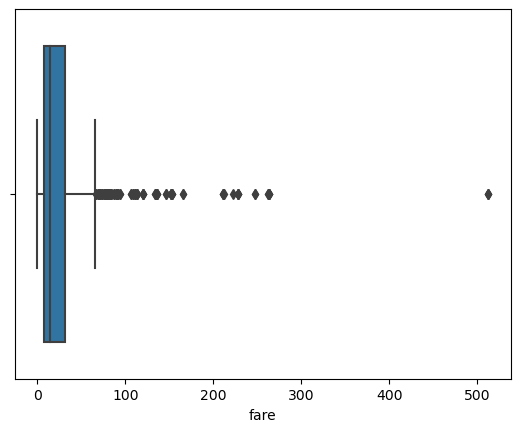

In [44]:
sns.boxplot(data['fare'])

In [46]:
# We'll replce the outliers value with upper_extreme when value > upper_extreme
# We'll replce the outliers value with lower_extreme when value < lower_extreme 

Q1 = data['fare'].quantile(0.25)
Q3 = data['fare'].quantile(0.75)
IQR = Q3 - Q1
l_e = Q1 -(1.5*IQR)
u_e = Q3 + (1.5*IQR)
data['fare']=np.where(data['fare']>u_e,u_e,np.where(data['fare']<l_e,l_e,data['fare']))

C:\Users\Ramini Varun Babu\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare'>

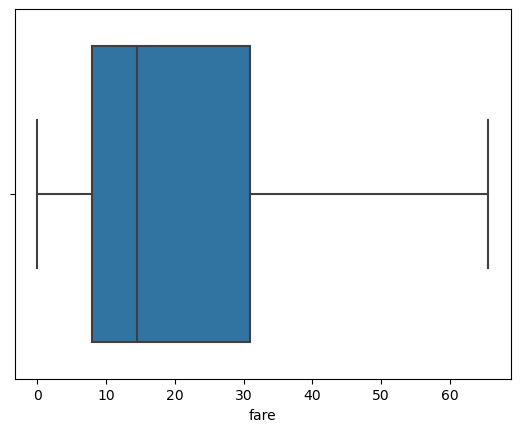

In [47]:
sns.boxplot(data['fare'])

C:\Users\Ramini Varun Babu\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

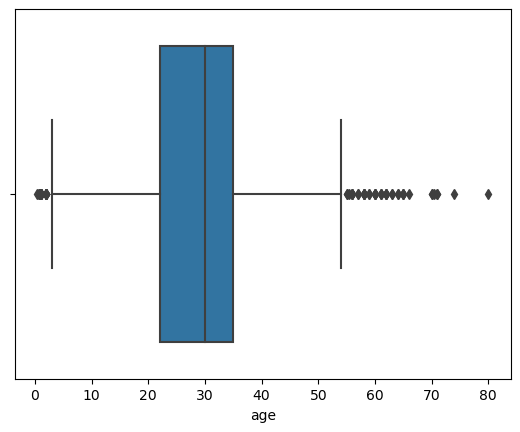

In [48]:
sns.boxplot(data['age'])

In [49]:
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3-Q1
l_e = Q1 - (1.5*IQR)
u_e = Q1 + (1.5*IQR)
data['age'] = np.where(data['age']>u_e,u_e,np.where(data['age']<l_e,l_e,data['age']))

C:\Users\Ramini Varun Babu\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

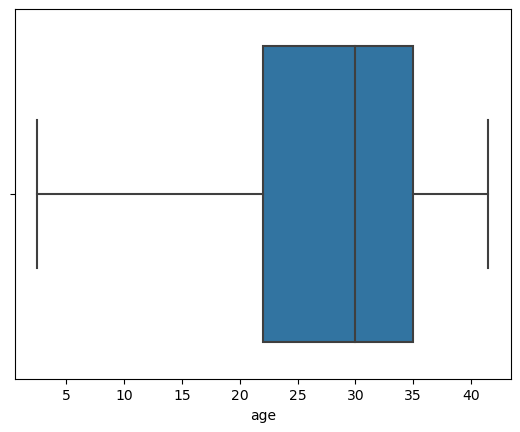

In [50]:
sns.boxplot(data['age'])

C:\Users\Ramini Varun Babu\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sibsp'>

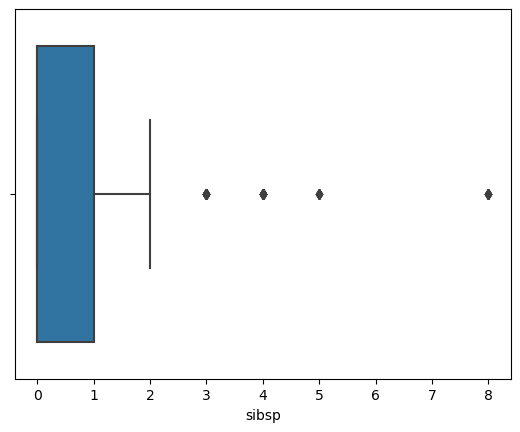

In [51]:
sns.boxplot(data['sibsp'])

In [52]:
Q1 = data['sibsp'].quantile(0.25)
Q3 = data['sibsp'].quantile(0.75)
IQR = Q3-Q1
l_e = Q1 - (1.5*IQR)
u_e = Q1 + (1.5*IQR)
data['sibsp'] = np.where(data['sibsp']>u_e,u_e,np.where(data['sibsp']<l_e,l_e,data['sibsp']))

C:\Users\Ramini Varun Babu\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sibsp'>

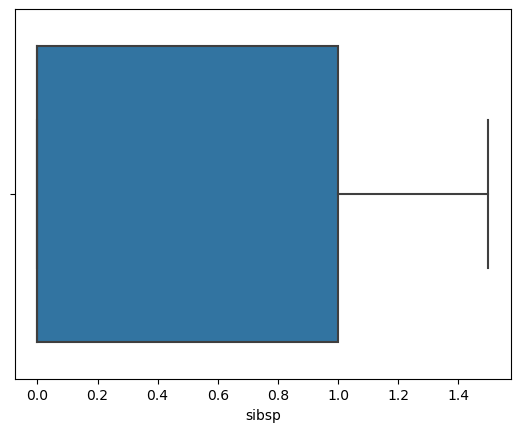

In [53]:
sns.boxplot(data['sibsp'])

C:\Users\Ramini Varun Babu\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='parch'>

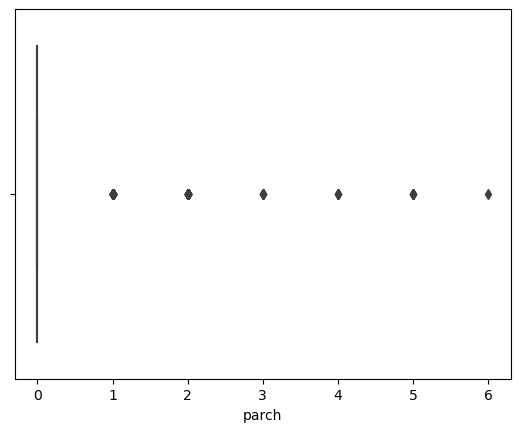

In [54]:
sns.boxplot(data['parch'])

In [55]:
Q1 = data['parch'].quantile(0.25)
Q3 = data['parch'].quantile(0.75)
IQR = Q3-Q1
l_e = Q1 - (1.5*IQR)
u_e = Q1 + (1.5*IQR)
data['parch'] = np.where(data['parch']>u_e,u_e,np.where(data['parch']<l_e,l_e,data['parch']))

C:\Users\Ramini Varun Babu\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='parch'>

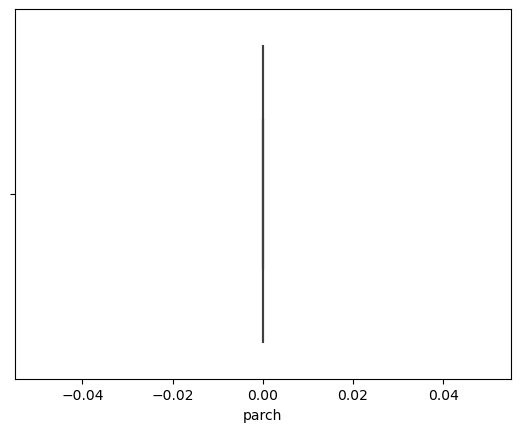

In [56]:
sns.boxplot(data['parch'])

ENCODING


In [60]:

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    float64
 5   parch        891 non-null    float64
 6   fare         891 non-null    float64
 7   embarked     891 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  embark_town  891 non-null    object 
 12  alive        891 non-null    object 
 13  alone        891 non-null    bool   
dtypes: bool(2), float64(4), int64(2), object(6)
memory usage: 85.4+ KB


In [62]:
data['sex'] = LE.fit_transform(data['sex'])
data['embarked'] = LE.fit_transform(data['embarked'])
data['class'] = LE.fit_transform(data['class'])
data['who'] = LE.fit_transform(data['who'])
data['embark_town'] = LE.fit_transform(data['embark_town'])
data['alive'] = LE.fit_transform(data['alive'])
data['adult_male'] = LE.fit_transform(data['adult_male'])
data['alone'] = LE.fit_transform(data['alone'])

In [64]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1.0,0.0,7.2500,2,2,1,1,2,0,0
1,1,1,0,38.0,1.0,0.0,65.6344,0,0,2,0,0,1,0
2,1,3,0,26.0,0.0,0.0,7.9250,2,2,2,0,2,1,1
3,1,1,0,35.0,1.0,0.0,53.1000,2,0,2,0,2,1,0
4,0,3,1,35.0,0.0,0.0,8.0500,2,2,1,1,2,0,1


Dividing the columns into dependent and independent variables

In [65]:
y = data['survived']
x = data.drop(columns=['survived'])

In [66]:
x.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,3,1,22.0,1.0,0.0,7.2500,2,2,1,1,2,0,0
1,1,0,38.0,1.0,0.0,65.6344,0,0,2,0,0,1,0
2,3,0,26.0,0.0,0.0,7.9250,2,2,2,0,2,1,1
3,1,0,35.0,1.0,0.0,53.1000,2,0,2,0,2,1,0
4,3,1,35.0,0.0,0.0,8.0500,2,2,1,1,2,0,1


In [ ]:
y.head()

SCALING

In [67]:
from sklearn.preprocessing import StandardScaler
name = x.columns
SS = StandardScaler()
z = SS.fit_transform(x)
x = pd.DataFrame(z,columns=name)
x

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0.827377,0.737695,-0.617133,1.185039,0.0,-0.820552,0.585954,0.827377,-0.355242,0.811922,0.585954,-0.789272,-1.231645
1,-1.566107,-1.355574,0.982185,1.185039,0.0,2.031623,-1.942303,-1.566107,1.328379,-1.231645,-1.942303,1.266990,-1.231645
2,0.827377,-1.355574,-0.217303,-0.664120,0.0,-0.787578,0.585954,0.827377,1.328379,-1.231645,0.585954,1.266990,0.811922
3,-1.566107,-1.355574,0.682313,1.185039,0.0,1.419297,0.585954,-1.566107,1.328379,-1.231645,0.585954,1.266990,-1.231645
4,0.827377,0.737695,0.682313,-0.664120,0.0,-0.781471,0.585954,0.827377,-0.355242,0.811922,0.585954,-0.789272,0.811922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,0.737695,-0.117346,-0.664120,0.0,-0.539655,0.585954,-0.369365,-0.355242,0.811922,0.585954,-0.789272,0.811922
887,-1.566107,-1.355574,-0.917005,-0.664120,0.0,0.290823,0.585954,-1.566107,1.328379,-1.231645,0.585954,1.266990,0.811922
888,0.827377,-1.355574,0.182526,1.185039,0.0,-0.029155,0.585954,0.827377,1.328379,-1.231645,0.585954,-0.789272,-1.231645
889,-1.566107,0.737695,-0.217303,-0.664120,0.0,0.290823,-1.942303,-1.566107,-0.355242,0.811922,-1.942303,1.266990,0.811922


SPLITTING THE DATA

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [70]:
x_train

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
140,0.827377,-1.355574,0.182526,-0.664120,0.0,-0.429944,-1.942303,0.827377,1.328379,-1.231645,-1.942303,-0.789272,-1.231645
439,-0.369365,0.737695,0.282483,-0.664120,0.0,-0.661785,0.585954,-0.369365,-0.355242,0.811922,0.585954,-0.789272,0.811922
817,-0.369365,0.737695,0.282483,1.185039,0.0,0.632990,-1.942303,-0.369365,-0.355242,0.811922,-1.942303,-0.789272,-1.231645
378,0.827377,0.737695,-0.817048,-0.664120,0.0,-0.978710,-1.942303,0.827377,-0.355242,0.811922,-1.942303,-0.789272,0.811922
491,0.827377,0.737695,-0.717090,-0.664120,0.0,-0.820552,0.585954,0.827377,-0.355242,0.811922,0.585954,-0.789272,0.811922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,-1.566107,-1.355574,1.082142,1.185039,0.0,2.031623,-1.942303,-1.566107,1.328379,-1.231645,-1.942303,1.266990,-1.231645
192,0.827377,-1.355574,-0.917005,1.185039,0.0,-0.791036,0.585954,0.827377,1.328379,-1.231645,0.585954,1.266990,-1.231645
629,0.827377,0.737695,0.182526,-0.664120,0.0,-0.796942,-0.678175,0.827377,-0.355242,0.811922,-0.678175,-0.789272,0.811922
559,0.827377,-1.355574,0.782270,1.185039,0.0,-0.324708,0.585954,0.827377,1.328379,-1.231645,0.585954,1.266990,-1.231645


In [71]:
x_test

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
495,0.827377,0.737695,0.182526,-0.664120,0.0,-0.468415,-1.942303,0.827377,-0.355242,0.811922,-1.942303,-0.789272,0.811922
648,0.827377,0.737695,0.182526,-0.664120,0.0,-0.805897,0.585954,0.827377,-0.355242,0.811922,0.585954,-0.789272,0.811922
278,0.827377,0.737695,-2.116493,2.109618,0.0,0.248078,-0.678175,0.827377,-2.038863,-1.231645,-0.678175,-0.789272,-1.231645
31,-1.566107,-1.355574,0.182526,1.185039,0.0,2.031623,-1.942303,-1.566107,1.328379,-1.231645,-1.942303,1.266990,-1.231645
255,0.827377,-1.355574,0.082569,-0.664120,0.0,-0.429944,-1.942303,0.827377,1.328379,-1.231645,-1.942303,1.266990,-1.231645
...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,0.827377,-1.355574,-1.516749,-0.664120,0.0,-0.821569,-1.942303,0.827377,-2.038863,-1.231645,-1.942303,1.266990,0.811922
837,0.827377,0.737695,0.182526,-0.664120,0.0,-0.781471,0.585954,0.827377,-0.355242,0.811922,0.585954,-0.789272,0.811922
215,-1.566107,-1.355574,0.282483,1.185039,0.0,2.031623,-1.942303,-1.566107,1.328379,-1.231645,-1.942303,1.266990,-1.231645
833,0.827377,0.737695,-0.517176,-0.664120,0.0,-0.791036,0.585954,0.827377,-0.355242,0.811922,0.585954,-0.789272,0.811922


In [72]:
y_train

140    0
439    0
817    0
378    0
491    0
      ..
835    1
192    1
629    0
559    1
684    0
Name: survived, Length: 712, dtype: int64

In [73]:
y_test

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: survived, Length: 179, dtype: int64


THE END